# Ungraded Lab: Improving Computer Vision Accuracy using Convolutions





In [17]:
import tensorflow as tf

fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

training_images, test_images = training_images/255.0, test_images/255.0

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

print('Test: ')
model_loss = model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

# Visualizing the Convolutions and Pooling

Let's explore how to show the convolutions graphically. The cell below prints the first 100 labels in the test set, and you can see that the ones at index `0`, index `23` and index `28` are all the same value (i.e. `9`). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [19]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 13ms/step


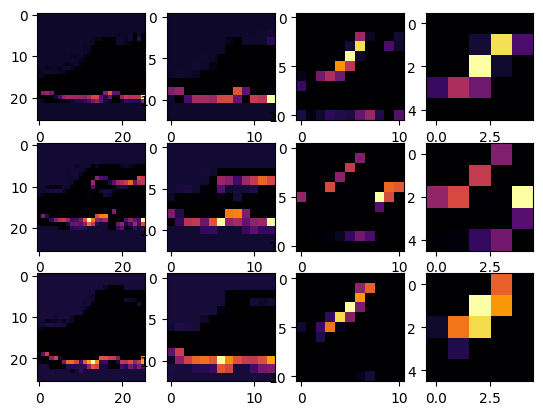

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

# Ungraded Lab: Exploring Convolutions

In this lab, you will explore how convolutions work by creating a basic convolution on a 2D grayscale image. First, you will load the image by taking the [ascent](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.ascent.html) image from [SciPy](https://scipy.org/). It's a nice, built-in picture with lots of angles and lines. 

In [27]:
from scipy import datasets

ascent_image = datasets.ascent()

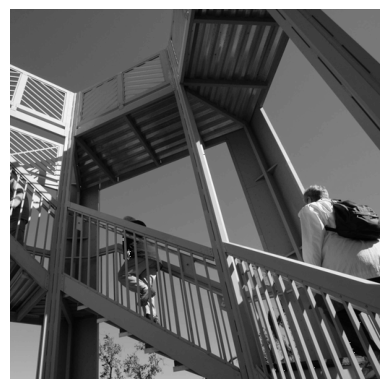

In [28]:
import matplotlib.pyplot as plt

plt.gray()
plt.grid(False)
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [29]:
# take a note the image size and copy the image
import numpy as np

image_transformed = np.copy(ascent_image)

size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [30]:
# create filter

filter = [[-1, -1,  0], [ -1,  0,  1], [ 0,  1,  1]]

weight=1

In [31]:
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        
        convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
        convolution = convolution + (ascent_image[x, y-1] * filter[1][0])
        convolution = convolution + (ascent_image[x-1, y] * filter[0][1])
        convolution = convolution + (ascent_image[x, y] * filter[1][1])
        convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])
        convolution = convolution + (ascent_image[x, y+1] * filter[1][2])
        convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])
        convolution = convolution + (ascent_image[x+1, y] * filter[2][1])
        convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])
        
        if(convolution < 0):
            convolution = 0
        if(convolution > 255):
            convolution = 255
        
        
        convolution *= weight
        
        image_transformed[x, y] = convolution

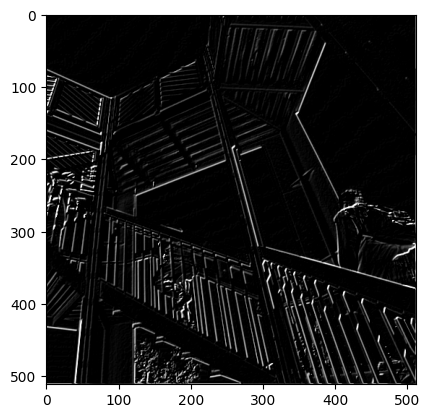

In [32]:
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

### Pooling

In [38]:
new_x = int(size_x/2)
new_y = int(size_y/2)

new_image = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        
        pixels = []
        pixels.append(image_transformed[x, y])
        pixels.append(image_transformed[x+1, y])
        pixels.append(image_transformed[x, y+1])
        pixels.append(image_transformed[x+1, y+1])
        
        new_pixel = max(pixels)
        
        new_image[x//2, y//2] = new_pixel

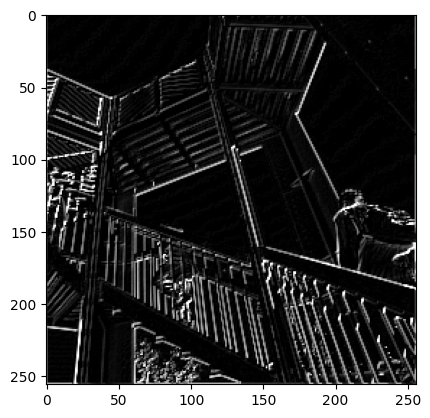

In [40]:
plt.gray()
plt.grid(False)
plt.imshow(new_image)
plt.show()